In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/ASUS/Downloads/hotel_bookings 2.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [8]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df.drop(["company","agent"],axis=1,inplace=True)
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

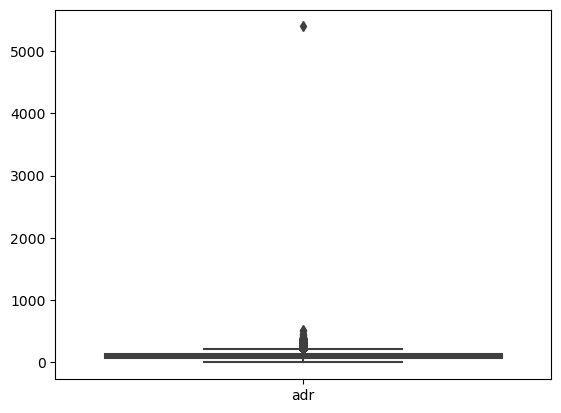

In [14]:
sns.boxplot(df[["adr"]])

In [15]:
df.skew()

is_canceled                        0.532528
lead_time                          1.344423
arrival_date_year                 -0.234359
arrival_date_week_number          -0.009920
arrival_date_day_of_month         -0.002526
stays_in_weekend_nights            1.298362
stays_in_week_nights               2.697714
adults                            18.459143
children                           4.105568
babies                            24.701477
is_repeated_guest                  5.317274
previous_cancellations            24.425277
previous_bookings_not_canceled    24.036749
booking_changes                    6.005337
days_in_waiting_list              11.919380
adr                               10.599418
required_car_parking_spaces        4.195564
total_of_special_requests          1.346720
dtype: float64

<Axes: xlabel='adr', ylabel='Density'>

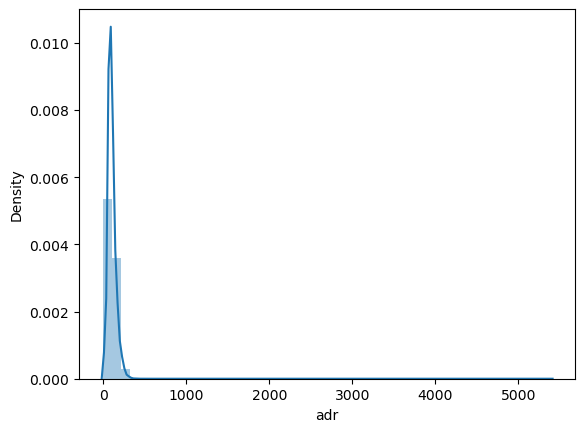

In [16]:
sns.distplot(df["adr"])

In [17]:
q1,q3=np.percentile(df["adr"],[25,75])
iqr=q3-q1
Lower_bound=q1-1.5*iqr
Upper_bound=q3+1.5*iqr
Lower_bound,Upper_bound

(-14.0, 210.0)

In [18]:
df[df["adr"]>Upper_bound].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
140,Resort Hotel,0,44,2015,July,28,5,2,0,3,...,G,3,No Deposit,0,Transient,225.00,2,0,Check-Out,2015-07-07
303,Resort Hotel,0,79,2015,July,28,11,2,6,2,...,G,1,No Deposit,0,Transient,213.75,0,0,Check-Out,2015-07-19
396,Resort Hotel,0,317,2015,July,29,14,1,5,2,...,G,1,No Deposit,0,Transient,230.67,1,2,Check-Out,2015-07-20
412,Resort Hotel,0,37,2015,July,29,15,2,6,2,...,H,0,No Deposit,0,Transient,216.13,1,0,Check-Out,2015-07-23
523,Resort Hotel,0,0,2015,July,29,18,0,1,2,...,C,0,No Deposit,0,Transient,249.00,0,0,Check-Out,2015-07-19


In [19]:
df[df["adr"]<Lower_bound]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [20]:
new_df=df[(df["adr"]<Upper_bound) & (df["adr"]>Lower_bound)]

In [21]:
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


<Axes: >

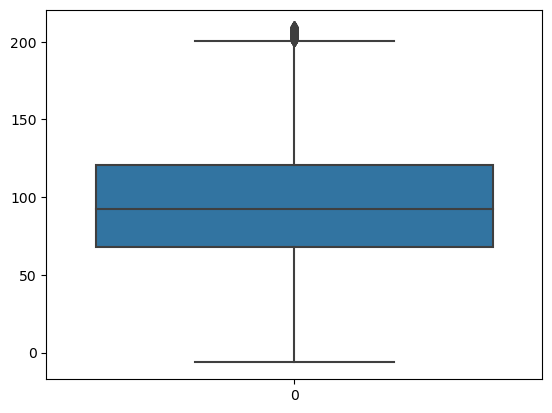

In [22]:
sns.boxplot(new_df["adr"])

In [23]:
new_df["adr"].skew()

0.34170084957814983

<Axes: xlabel='adr', ylabel='Density'>

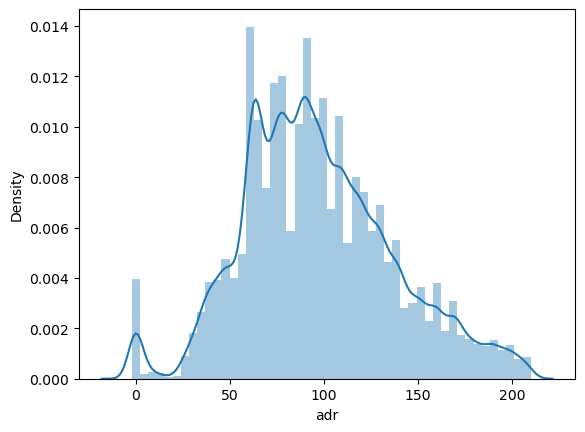

In [24]:
sns.distplot(new_df["adr"])

In [25]:
new_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [26]:
cancelation_per=new_df["is_canceled"].value_counts(normalize=True)
cancelation_per

0    0.629234
1    0.370766
Name: is_canceled, dtype: float64

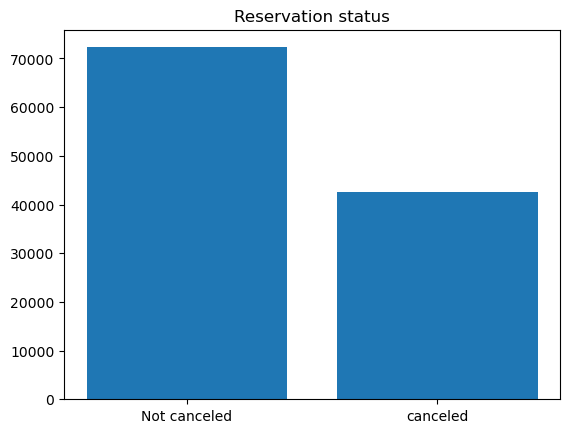

In [27]:
plt.bar(["Not canceled","canceled"],new_df["is_canceled"].value_counts())
plt.title("Reservation status")
plt.show()

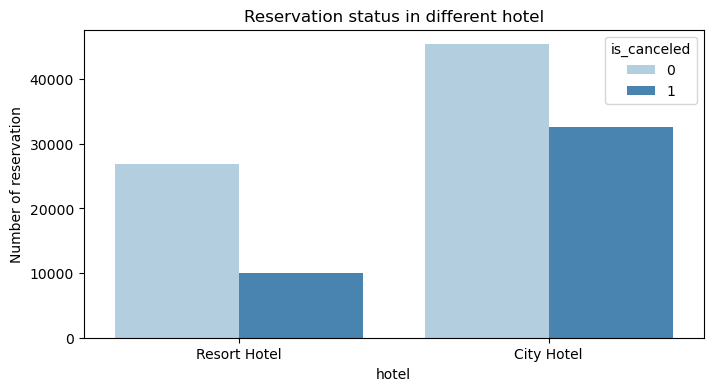

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(x="hotel",hue="is_canceled",data=new_df,palette="Blues")
# ax1.legend(bbox_to_anchor(1,1))
plt.title("Reservation status in different hotel")
plt.xlabel("hotel")
plt.ylabel("Number of reservation")
plt.show()

In [29]:
resort_hotel=new_df[new_df["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=True)


0    0.728158
1    0.271842
Name: is_canceled, dtype: float64

In [30]:
City_hotel=new_df[new_df["hotel"]=="City Hotel"]
City_hotel["is_canceled"].value_counts(normalize=True)


0    0.58228
1    0.41772
Name: is_canceled, dtype: float64

In [31]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()

In [32]:
City_hotel=City_hotel.groupby("reservation_status_date")[["adr"]].mean()

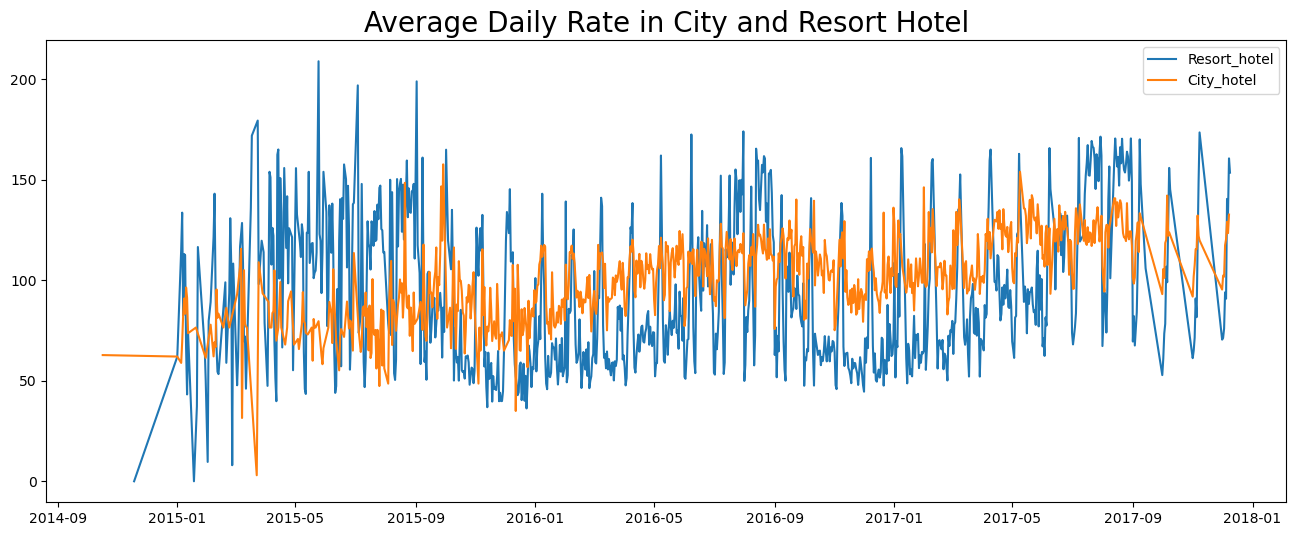

In [33]:
plt.figure(figsize=(16,6))
plt.plot(resort_hotel.index,resort_hotel["adr"],label="Resort_hotel")
plt.plot(City_hotel.index,City_hotel["adr"],label="City_hotel")
plt.title("Average Daily Rate in City and Resort Hotel",size=20)
plt.legend()
plt.show()

In [34]:
new_df["Month"]=new_df["reservation_status_date"].dt.month

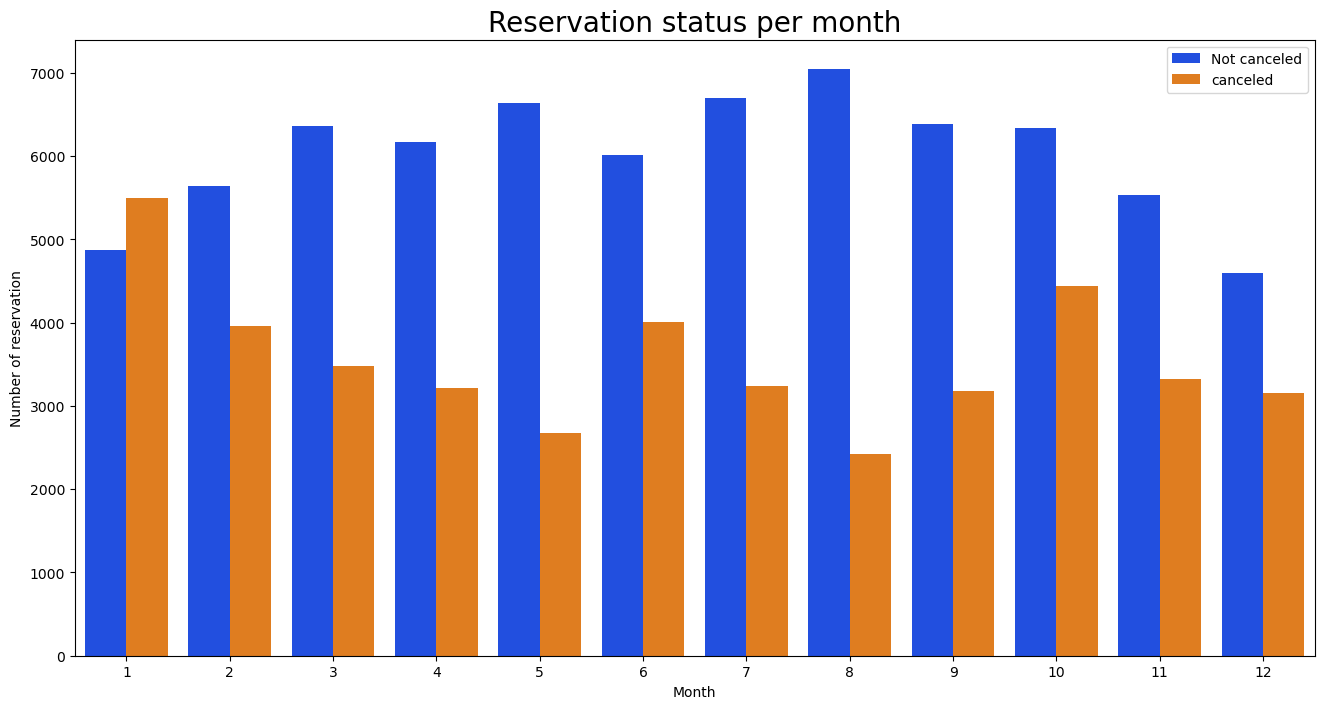

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(x="Month",hue="is_canceled",data=new_df,palette="bright")
plt.title("Reservation status per month",size=20)
plt.xlabel("Month")
plt.ylabel("Number of reservation")
plt.legend(["Not canceled",'canceled'])
plt.show()

In [36]:
canceled_p=new_df[new_df["is_canceled"]==1].groupby("Month")[["adr"]].sum().reset_index()

Text(0.5, 1.0, 'ADR per month')

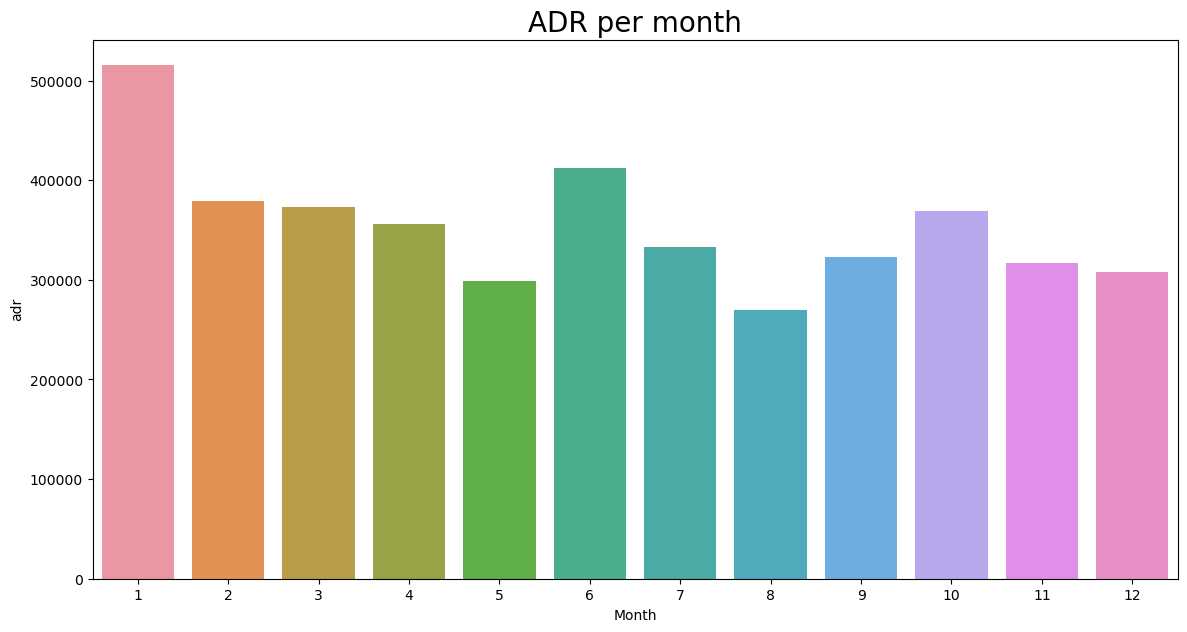

In [37]:
plt.figure(figsize=(14,7))
sns.barplot(x=canceled_p["Month"],y=canceled_p["adr"])
plt.title("ADR per month",fontsize=20)

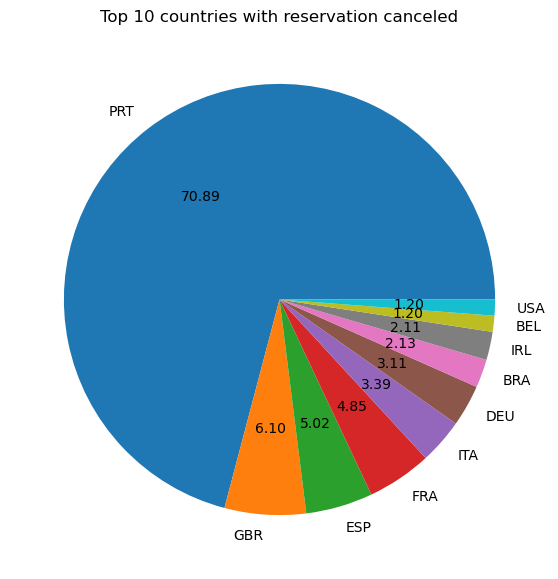

In [38]:
cancelled_data=new_df[new_df["is_canceled"]==1]
top_10_country=cancelled_data["country"].value_counts()[:10]
plt.figure(figsize=(7,7))
plt.pie(top_10_country,autopct="%.2f",labels=top_10_country.index)
plt.title("Top 10 countries with reservation canceled")
plt.show()

In [39]:
new_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Month'],
      dtype='object')

In [40]:
new_df["market_segment"].value_counts()

Online TA        53534
Offline TA/TO    24052
Groups           19709
Direct           11522
Corporate         5104
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [41]:
new_df["market_segment"].value_counts(normalize=True)

Online TA        0.465951
Offline TA/TO    0.209344
Groups           0.171544
Direct           0.100285
Corporate        0.044424
Complementary    0.006389
Aviation         0.002063
Name: market_segment, dtype: float64

In [42]:
# cancellation rate by market segment
cancelled_data["market_segment"].value_counts(normalize=True)

Online TA        0.456078
Groups           0.283088
Offline TA/TO    0.193859
Direct           0.040730
Corporate        0.022912
Complementary    0.002113
Aviation         0.001221
Name: market_segment, dtype: float64

In [43]:
cancelled_df_adr=cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_df_adr.reset_index()
cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

In [44]:
not_cancelled_data=new_df[new_df["is_canceled"]==0]
not_cancelled_df_adr=not_cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_df_adr.reset_index()
not_cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

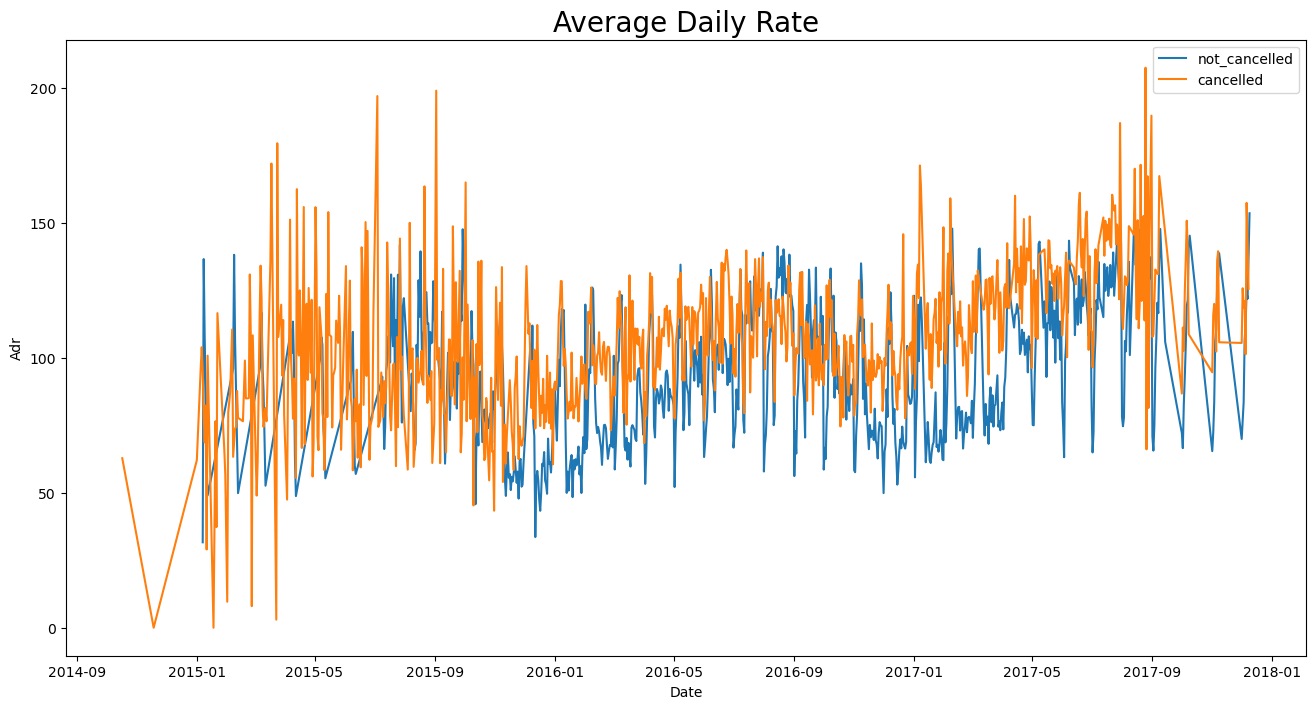

In [45]:
plt.figure(figsize=(16,8))
plt.plot(not_cancelled_df_adr.index,not_cancelled_df_adr["adr"],label="not_cancelled")
plt.plot(cancelled_df_adr.index,cancelled_df_adr["adr"],label="cancelled")

plt.title("Average Daily Rate",size=20)
plt.xlabel("Date")
plt.ylabel("Adr")
plt.legend()
plt.show()

In [51]:
cancelled_df=new_df[(new_df["reservation_status_date"]>"2016") & (new_df["reservation_status_date"]<"2017-09")]
not_cancelled_df=new_df[(new_df["reservation_status_date"]>"2016") & (new_df["reservation_status_date"]<"2017-09")]


In [59]:
cancelled_df_adr=cancelled_df.groupby("reservation_status_date")["adr"].mean()
cancelled_df_adr.reset_index()
cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

not_cancelled_df_adr=not_cancelled_df.groupby("reservation_status_date")["adr"].mean()
not_cancelled_df_adr.reset_index()
not_cancelled_df_adr.sort_values("reservation_status_date",inplace=True)



plt.plot(x=cancelled_df_adr["reservation_status_date"],y=cancelled_df_adr["adr"])
plt.plot(x=not_cancelled_df_adr["reservation_status_date"],y=not_cancelled_df_adr["adr"])

plt.show()

ValueError: No axis named reservation_status_date for object type Series